# Predictive Analysis on Bigmart Outlet Sales

# Importing Libraries

In [649]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [650]:
pip install xgboost

# Load the dataset

In [597]:
data = pd.read_csv("Tech_Train.csv")
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

# Basic info 

In [651]:
data.shape

(8523, 26)

In [652]:
data.size

221598

In [653]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Outlet_Years               8523 non-null   int64  
 9   Outlet                     8523 non-null   int32  
 10  Item_Fat_Content_0         8523 non-null   uint8  
 11  Item_Fat_Content_1         8523 non-null   uint8  
 12  Item_Fat_Content_2         8523 non-null   uint8  
 13  Outlet_Size_0              8523 non-null   uint8

In [654]:
data.describe()

Item_Weight  Item_Visibility    Item_Type     Item_MRP  \
count  8523.000000      8523.000000  8523.000000  8523.000000   
mean     12.857645         0.070213     7.226681   140.992782   
std       4.226124         0.048742     4.209990    62.275067   
min       4.555000         0.003575     0.000000    31.290000   
25%       9.310000         0.033085     4.000000    93.826500   
50%      12.857645         0.062517     6.000000   143.012800   
75%      16.000000         0.094585    10.000000   185.643700   
max      21.350000         0.328391    15.000000   266.888400   

       Outlet_Establishment_Year  Item_Outlet_Sales  Outlet_Years  \
count                8523.000000        8523.000000   8523.000000   
mean                 1997.831867           7.297863     15.168133   
std                     8.371760           1.015211      8.371760   
min                  1985.000000           3.534854      4.000000   
25%                  1987.000000           6.727728      9.000000   
50%                  1999.000000           7.492945     14.000000   
75%                  2004.000000           8.039898     26.000000   
max                  2009.000000           9.479448     28.000000   

            Outlet  Item_Fat_Content_0  Item_Fat_Content_1  ...  \
count  8523.000000         8523.000000         8523.000000  ...   
mean      4.722281            0.459697            0.187610  ...   
std       2.837201            0.498402            0.390423  ...   
min       0.000000            0.000000            0.000000  ...   
25%       2.000000            0.000000            0.000000  ...   
50%       5.000000            0.000000            0.000000  ...   
75%       7.000000            1.000000            0.000000  ...   
max       9.000000            1.000000            1.000000  ...   

       Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
count             8523.000000             8523.000000             8523.000000   
mean                 0.280183                0.326763                0.393054   
std                  0.449115                0.469057                0.488457   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  1.000000                1.000000                1.000000   
max                  1.000000                1.000000                1.000000   

       Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  \
count    8523.000000    8523.000000    8523.000000    8523.000000   
mean        0.127068       0.654347       0.108882       0.109703   
std         0.333069       0.475609       0.311509       0.312538   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         0.000000       1.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       New_Item_Type_0  New_Item_Type_1  New_Item_Type_2  
count      8523.000000      8523.000000      8523.000000  
mean          0.093746         0.718644         0.187610  
std           0.291493         0.449687         0.390423  
min           0.000000         0.000000         0.000000  
25%           0.000000         0.000000         0.000000  
50%           0.000000         1.000000         0.000000  
75%           0.000000         1.000000         0.000000  
max           1.000000         1.000000         1.000000  

[8 rows x 24 columns]

In [655]:
data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   536
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Item_Outlet_Sales            3493
Outlet_Years                    9
Outlet                         10
Item_Fat_Content_0              2
Item_Fat_Content_1              2
Item_Fat_Content_2              2
Outlet_Size_0                   2
Outlet_Size_1                   2
Outlet_Size_2                   2
Outlet_Location_Type_0          2
Outlet_Location_Type_1          2
Outlet_Location_Type_2          2
Outlet_Type_0                   2
Outlet_Type_1                   2
Outlet_Type_2                   2
Outlet_Type_3                   2
New_Item_Type_0                 2
New_Item_Type_1                 2
New_Item_Type_2                 2
dtype: int64

# Preprocessing

# Handling missing data

In [603]:
missing_values = data.isnull().sum()
print(missing_values)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [604]:
cat_col=[]
for x in data.dtypes.index:
    if data.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [605]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [606]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(data[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [607]:
# fill the missing values
item_weight_mean = data.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1555 rows x 1 columns]

In [608]:
miss_bool = data['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [609]:
for i, item in enumerate(data['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            data['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            data['Item_Weight'][i] = np.mean(data['Item_Weight'])


In [610]:
data['Item_Weight'].isnull().sum()

0

In [611]:
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [612]:
miss_bool = data['Outlet_Size'].isnull()
data.loc[miss_bool, 'Outlet_Size'] = data.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [613]:
data['Outlet_Size'].isnull().sum()

0

In [614]:
sum(data['Item_Visibility']==0)

526

In [615]:
# replace zeros with mean
data.loc[:, 'Item_Visibility'].replace([0], [data['Item_Visibility'].mean()], inplace=True)
sum(data['Item_Visibility']==0)

0

In [616]:
# combine item fat content
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Creation of New Attributes

In [617]:
data['New_Item_Type'] = data['Item_Identifier'].apply(lambda x: x[:2])
data['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [618]:
data['New_Item_Type'] = data['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
data['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [619]:
data.loc[data['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [620]:
# create small values for establishment year
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']

In [621]:
data['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [622]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.066132   
4           NCD19         8.93       Non-Edible         0.066132   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales   New_Item_Type  Outlet_Years  
0  Supermarket Type1          3735.1380            Food            14  
1  Supermarket Type2           443.4228          Drinks             4  
2  Supermarket Type1          2097.2700            Food            14  
3      Grocery Store           732.3800            Food            15  
4  Supermarket Type1           994.7052  Non-Consumable            26

# Exploratory Data Analysis

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

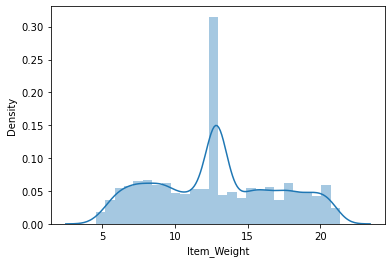

In [623]:
sns.distplot(data['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

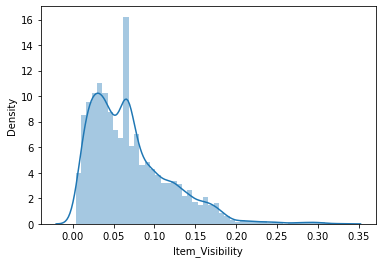

In [624]:
sns.distplot(data['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

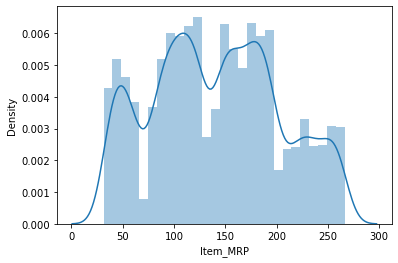

In [625]:
sns.distplot(data['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

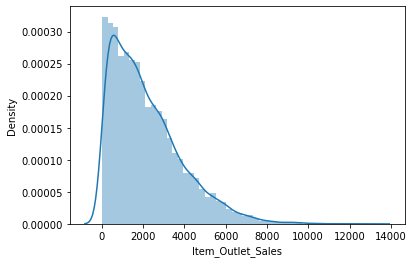

In [626]:
sns.distplot(data['Item_Outlet_Sales'])

In [627]:
data['Item_Outlet_Sales'] = np.log(1+data['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

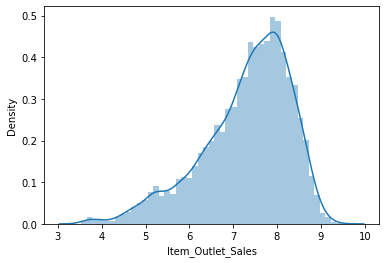

In [628]:
sns.distplot(data['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

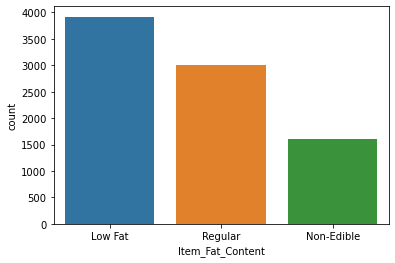

In [629]:
sns.countplot(data["Item_Fat_Content"])

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

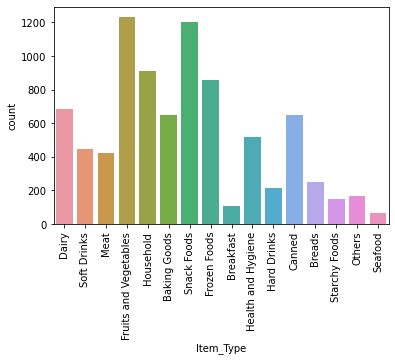

In [630]:
# plt.figure(figsize=(15,5))
l = list(data['Item_Type'].unique())
chart = sns.countplot(data["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

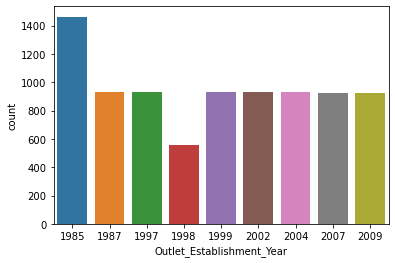

In [631]:
sns.countplot(data['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

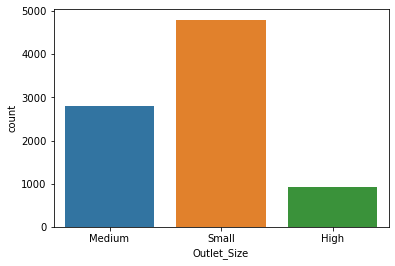

In [632]:
sns.countplot(data['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

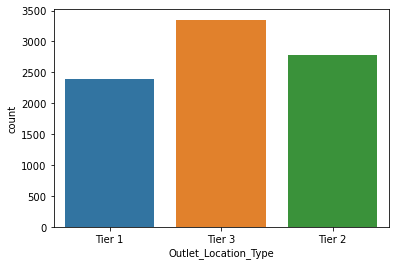

In [633]:
sns.countplot(data['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

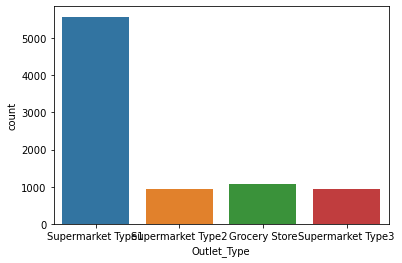

In [634]:
sns.countplot(data['Outlet_Type'])

# Coorelation Matrix

<AxesSubplot:>

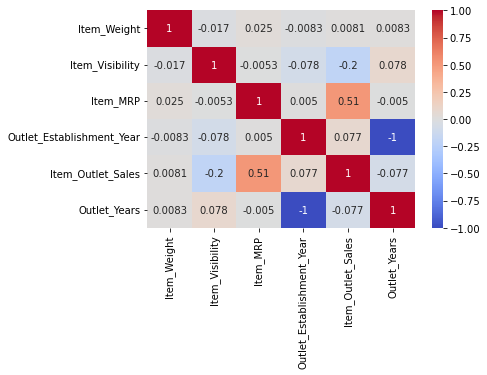

In [635]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [636]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.066132   
4           NCD19         8.93       Non-Edible         0.066132   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales   New_Item_Type  Outlet_Years  
0  Supermarket Type1           8.225808            Food            14  
1  Supermarket Type2           6.096776          Drinks             4  
2  Supermarket Type1           7.648868            Food            14  
3      Grocery Store           6.597664            Food            15  
4  Supermarket Type1           6.903451  Non-Consumable            26

# Label Encoding

In [637]:
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    data[col] = le.fit_transform(data[col])

# Onehot Encoding

In [638]:
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
data.head()

Item_Identifier  Item_Weight  Item_Visibility  Item_Type  Item_MRP  \
0           FDA15         9.30         0.016047          4  249.8092   
1           DRC01         5.92         0.019278         14   48.2692   
2           FDN15        17.50         0.016760         10  141.6180   
3           FDX07        19.20         0.066132          6  182.0950   
4           NCD19         8.93         0.066132          9   53.8614   

  Outlet_Identifier  Outlet_Establishment_Year  Item_Outlet_Sales  \
0            OUT049                       1999           8.225808   
1            OUT018                       2009           6.096776   
2            OUT049                       1999           7.648868   
3            OUT010                       1998           6.597664   
4            OUT013                       1987           6.903451   

   Outlet_Years  Outlet  ...  Outlet_Location_Type_0  Outlet_Location_Type_1  \
0            14       9  ...                       1                       0   
1             4       3  ...                       0                       0   
2            14       9  ...                       1                       0   
3            15       0  ...                       0                       0   
4            26       1  ...                       0                       0   

   Outlet_Location_Type_2  Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  \
0                       0              0              1              0   
1                       1              0              0              1   
2                       0              0              1              0   
3                       1              1              0              0   
4                       1              0              1              0   

   Outlet_Type_3  New_Item_Type_0  New_Item_Type_1  New_Item_Type_2  
0              0                0                1                0  
1              0                1                0                0  
2              0                0                1                0  
3              0                0                1                0  
4              0                0                0                1  

[5 rows x 26 columns]

# Spliting

In [639]:
X = data.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = data['Item_Outlet_Sales']


# Model Training

In [658]:
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

# Linear Regression

Model Report
MSE: 0.2880065032501795
CV Score: 0.28911084886374205


<AxesSubplot:title={'center':'Model Coefficients'}>

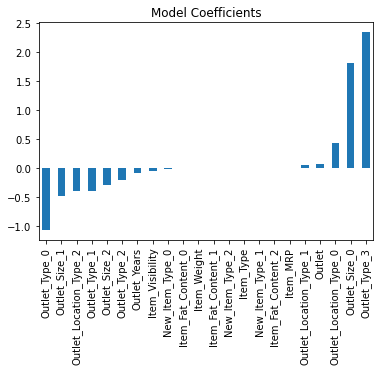

In [641]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

# Regularized Linear Regression

Model Report
MSE: 0.4280298560568369
CV Score: 0.428928925156264


<AxesSubplot:title={'center':'Model Coefficients'}>

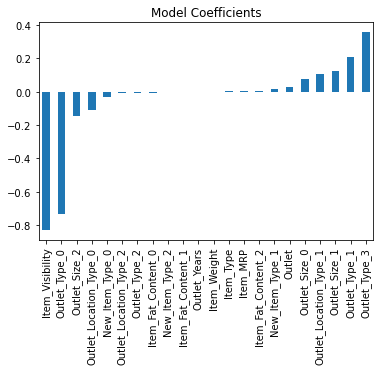

In [659]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

# RandomForestRegressor

Model Report
MSE: 0.04254898470993311
CV Score: 0.3100980010936273


<AxesSubplot:title={'center':'Feature Importance'}>

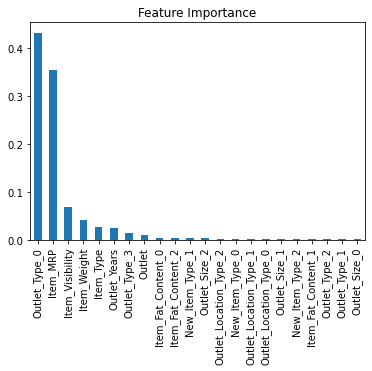

In [660]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

# XGBoost

In [648]:
xgb_model = xgb.XGBRegressor(tree_method='approx')  # Specify tree_method as 'approx'
xgb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgb_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.64853081021081e-32
